In [1]:
#2.Supervised Learning Algorithms - KNN:  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_distance(x1, x2):
    return abs(x1 - x2)

In [5]:
class KNNClassifier:
    def __init__(self, k=2, p=1):
        self.k = k
        self.p = p
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
    
    def predict(self, X):
        predictions = []
        self.confidence = []
        for pred_row in X:
            distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                distances.append(distance)
            neighbors = self.y[np.argsort(distances)[:self.k]]
            neighbors_bc = np.bincount(neighbors)
            prediction = np.argmax(neighbors_bc)
            self.confidence.append(neighbors_bc[prediction]/len(neighbors))
            predictions.append(prediction)
        predictions = np.array(predictions)
        return predictions

In [6]:
knn = KNNClassifier()  # k = 2 and using manhattan distance
knn.fit(X_train,y_train)

In [7]:
y_pred=knn.predict(X_test)

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Accuracy :  0.93


<AxesSubplot:>

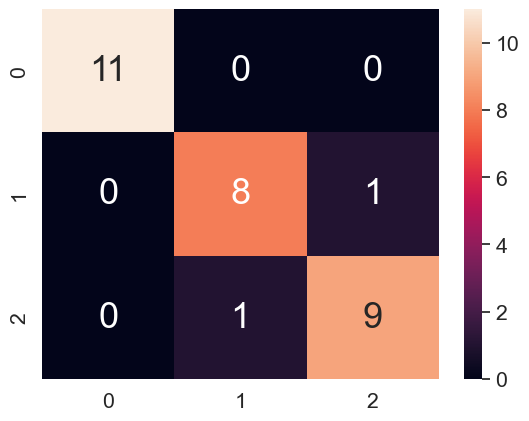

In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")

df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

Confusion Matrix:
[[11  0  0]
 [ 0  8  1]
 [ 0  1  9]]
Accuracy :  0.93


<AxesSubplot:>

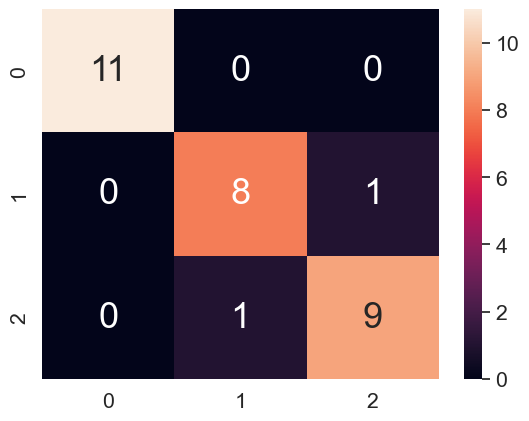

In [9]:
knn = KNNClassifier(k = 3, p = 2)  # k = 3 and using euclidean distance
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")
df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

Confusion Matrix:
[[11  0  0]
 [ 0  9  0]
 [ 0  4  6]]
Accuracy :  0.87


<AxesSubplot:>

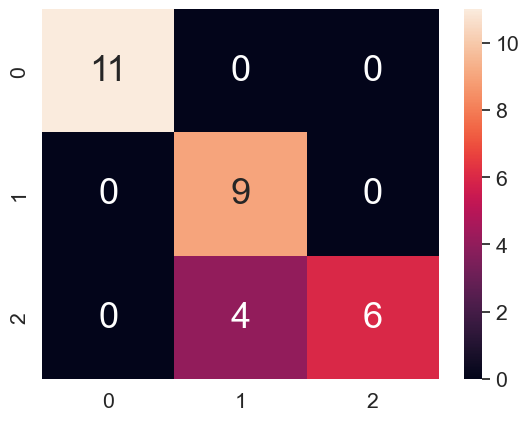

In [10]:
knn = KNNClassifier(k = 50, p = 2)  # k = 50 and using euclidean distance
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print(f"Accuracy : {accuracy_score(y_test, y_pred): 0.2f}")
df = pd.DataFrame(cm)
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

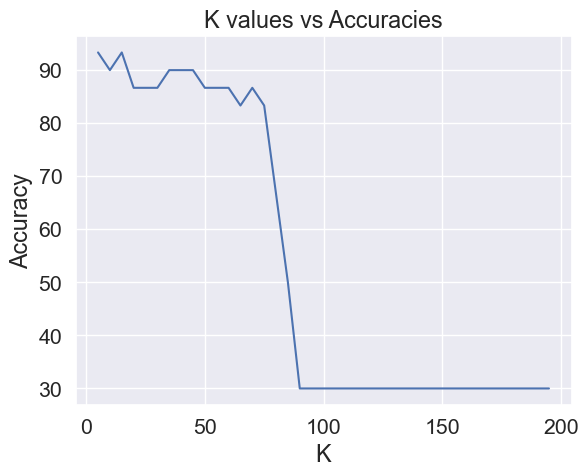

In [11]:
k_values = []
accuracies = []
for i in range(5,200,5):  #steps in values of k with 5
    knn = KNNClassifier(k = i, p = 2)  
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) * 100
    k_values.append(i)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.title("K values vs Accuracies")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()  